In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('~/Downloads/ubersuggest_space travel.csv')

In [3]:
df.head()

,Keyword,Search Volume,CPC,Competition
0,space travel,6600.0,1.69,0.05
1,nasa,550000.0,1.58,0.02
2,spacex,550000.0,0.68,0.01
3,living spaces,368000.0,0.37,0.28
4,space,246000.0,0.54,0.11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 4 columns):
Keyword           898 non-null object
 Search Volume    765 non-null float64
 CPC              212 non-null float64
 Competition      466 non-null float64
dtypes: float64(3), object(1)
memory usage: 28.1+ KB


In [5]:
df.describe()

,Search Volume,CPC,Competition
count,765.000000,212.000000,466.000000
mean,3602.653595,1.623302,0.093155
std,33395.053959,1.464346,0.162032
min,10.000000,0.010000,0.000000
25%,10.000000,0.667500,0.020000
50%,20.000000,1.550000,0.040000
75%,70.000000,2.172500,0.100000
max,550000.000000,15.640000,1.000000


In [9]:
dfc = df.dropna()

In [12]:
dfc.columns = ['Keyword', 'Search Volume', 'CPC', 'Competition']

In [17]:
dfc.describe()

,Search Volume,CPC,Competition
count,212.000000,212.000000,212.000000
mean,12874.669811,1.623302,0.136132
std,62598.038477,1.464346,0.209613
min,10.000000,0.010000,0.000000
25%,37.500000,0.667500,0.030000
50%,210.000000,1.550000,0.070000
75%,1900.000000,2.172500,0.130000
max,550000.000000,15.640000,1.000000


In [18]:
dfc.loc[dfc['Search Volume'] > 100000
       ]

,Keyword,Search Volume,CPC,Competition
1,nasa,550000.0,1.58,0.02
2,spacex,550000.0,0.68,0.01
3,living spaces,368000.0,0.37,0.28
4,space,246000.0,0.54,0.11
5,kennedy space center,135000.0,0.39,0.17
6,travel,135000.0,2.59,0.59


(0, 90000)

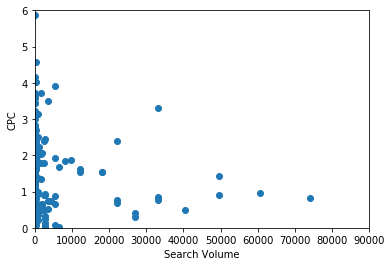

In [41]:
plt.scatter(dfc['Search Volume'],dfc['CPC'])
plt.xlabel('Search Volume')
plt.ylabel('CPC')
plt.ylim((0,6))
plt.xlim((0,90000))

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dfc.drop('Keyword',axis=1))
scaled_features = scaler.transform(dfc.drop('Keyword',axis=1))
X = pd.DataFrame(scaled_features,columns=['Search Volumn','CPC','Competition'])
X.head()

,Search Volumn,CPC,Competition
0,-0.100475,0.045656,-0.411883
1,8.600855,-0.029641,-0.555342
2,8.600855,-0.645704,-0.603162
3,5.686534,-0.857904,0.687975
4,3.732978,-0.741536,-0.124963


In [25]:
from pandas.plotting import scatter_matrix

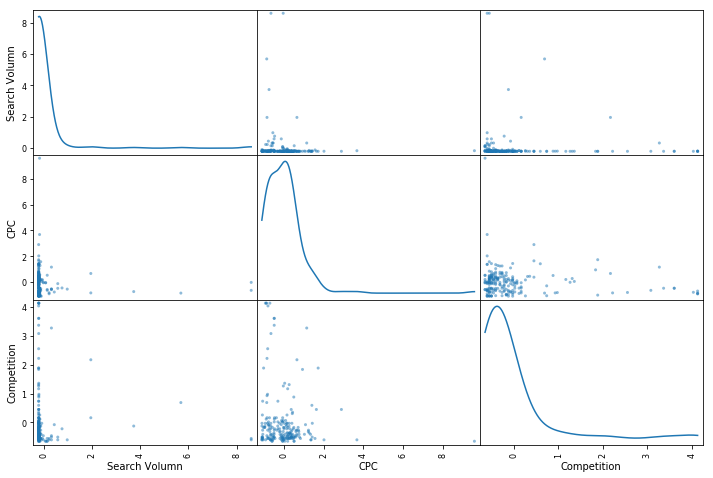

In [29]:
scatter_matrix(X,diagonal='kde',figsize=(12,8));

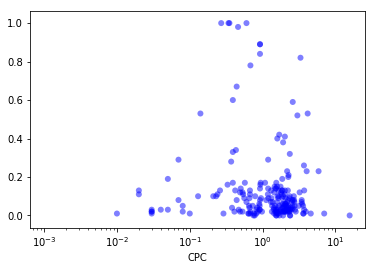

In [35]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(dfc['CPC'] ,dfc['Competition'] , c='blue', alpha=0.5, edgecolors='none')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('CPC')

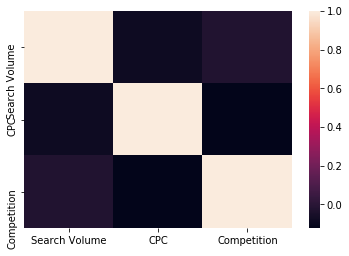

In [42]:
sns.heatmap(dfc.corr())

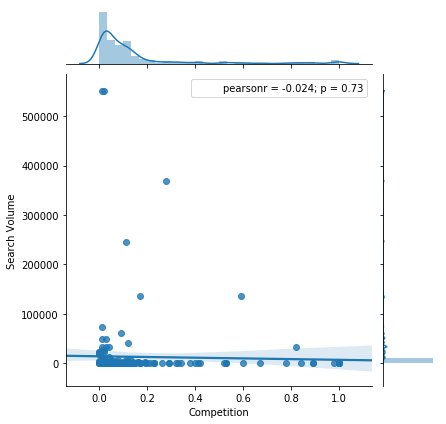

In [52]:
sns.jointplot(x='Competition',y='Search Volume',data=dfc,kind='reg')